In [1]:
#Derin Otokodlayıcılar (Deep Autoencoders) - Anomali Tespiti

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ITU\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ITU\AppData\Roaming\Pyt

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",
                  names = ["Age_of_patient", "year_of_operation", "positive_axillary_nodes", 
                          "Survival_status"])

In [4]:
print(data.head())

   Age_of_patient  year_of_operation  positive_axillary_nodes  Survival_status
0              30                 64                        1                1
1              30                 62                        3                1
2              30                 65                        0                1
3              31                 59                        2                1
4              31                 65                        4                1


In [5]:
print(data.shape)

(306, 4)


In [6]:
X = data.drop("Survival_status", axis = 1) 
y = data["Survival_status"]

In [7]:
#Normalizasyon
from sklearn.preprocessing import MinMaxScaler
işlem = MinMaxScaler(feature_range = (0,1))
X = işlem.fit_transform(X)

In [10]:
feature_sayısı = X.shape[1]
giriş_boyutu = Input(shape = (feature_sayısı, ))

#Kodlanacak değişkenlerin sayısı (darboğaz nöron sayısı)
darboğaz_boyutu = 2

#Kodlayıcı (Encoder) katmanlarının tanımlanması
kodlayıcı = Dense(3, activation = "relu")(giriş_boyutu)
kodlayıcı = Dense(3, activation = "relu")(giriş_boyutu)

#Darboğazın tanımlanması
kodlayıcı = Dense(darboğaz_boyutu, activation = "relu")(kodlayıcı)

#Kod_çözücü
kod_çözücü = Dense(3, activation = "relu")(kodlayıcı)

kod_çözücü = Dense(feature_sayısı, activation = "sigmoid")(kodlayıcı)

In [11]:
#Otokodlayıcı modelin tanımlanması
otokodlayıcı = Model(
    inputs = giriş_boyutu,
    outputs = kod_çözücü
)

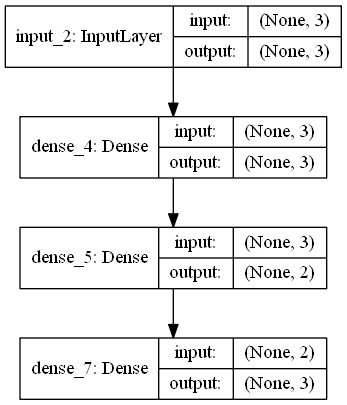

In [12]:
import tensorflow as tf
tf.keras.utils.plot_model(otokodlayıcı, "AIGroup7-haberman.png", show_shapes = True, 
                          show_layer_names = True)

In [13]:
otokodlayıcı.compile(
    loss = "mse",
    optimizer = "adam"
)

In [14]:
history = otokodlayıcı.fit(
    X,
    X,
    epochs = 100,
    batch_size = 16,
    verbose = 2,
    validation_split = 0.2
)


Train on 244 samples, validate on 62 samples
Epoch 1/100
 - 0s - loss: 0.1089 - val_loss: 0.1193
Epoch 2/100
 - 0s - loss: 0.1073 - val_loss: 0.1187
Epoch 3/100
 - 0s - loss: 0.1058 - val_loss: 0.1181
Epoch 4/100
 - 0s - loss: 0.1042 - val_loss: 0.1175
Epoch 5/100
 - 0s - loss: 0.1028 - val_loss: 0.1169
Epoch 6/100
 - 0s - loss: 0.1014 - val_loss: 0.1163
Epoch 7/100
 - 0s - loss: 0.0999 - val_loss: 0.1156
Epoch 8/100
 - 0s - loss: 0.0986 - val_loss: 0.1150
Epoch 9/100
 - 0s - loss: 0.0973 - val_loss: 0.1144
Epoch 10/100
 - 0s - loss: 0.0960 - val_loss: 0.1138
Epoch 11/100
 - 0s - loss: 0.0947 - val_loss: 0.1131
Epoch 12/100
 - 0s - loss: 0.0934 - val_loss: 0.1124
Epoch 13/100
 - 0s - loss: 0.0922 - val_loss: 0.1112
Epoch 14/100
 - 0s - loss: 0.0908 - val_loss: 0.1085
Epoch 15/100
 - 0s - loss: 0.0893 - val_loss: 0.1040
Epoch 16/100
 - 0s - loss: 0.0875 - val_loss: 0.1005
Epoch 17/100
 - 0s - loss: 0.0854 - val_loss: 0.0962
Epoch 18/100
 - 0s - loss: 0.0830 - val_loss: 0.0911
Epoch 19/

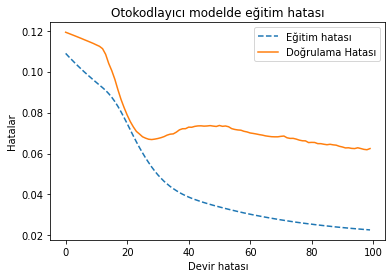

In [16]:
#Eğitilen modelin hatası ve doğrulama hatası
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Otokodlayıcı modelde eğitim hatası")
plt.ylabel("Hatalar")
plt.xlabel("Devir hatası")
plt.legend(["Eğitim hatası", "Doğrulama Hatası"], loc = "upper right")
plt.show()

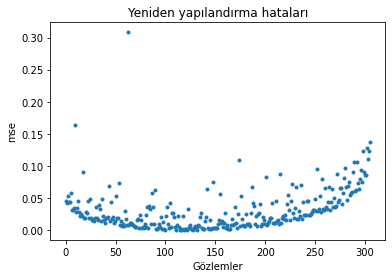

In [17]:
predictions = otokodlayıcı.predict(X)
mse = np.mean(np.power(X - predictions, 2), axis = 1)

#Reconstruction (Yeniden yapılandırma) hata grafiği
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = '.')
plt.title("Yeniden yapılandırma hataları")
plt.ylabel("mse")
plt.xlabel("Gözlemler")
plt.show()

In [18]:
print("\n Eşik değeri giriniz : \n")
eşik = float(input())


 Eşik değeri giriniz : 

0.11


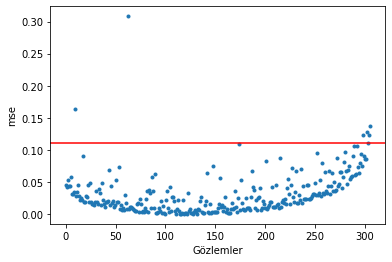

In [19]:
plt.plot(mse, linewidth = 0, label = "Eğitim", marker = ".")
plt.ylabel("mse")
plt.xlabel("Gözlemler")
plt.axhline(y = eşik, color = "r")
plt.show()

In [20]:
anormal = pd.DataFrame(data[mse > eşik])
print("Anormal değerlerin sayısı", anormal.shape)

Anormal değerlerin sayısı (7, 4)


In [21]:
print("Anormal değerler: \n", anormal)

Anormal değerler: 
      Age_of_patient  year_of_operation  positive_axillary_nodes  \
9                34                 58                       30   
62               43                 58                       52   
298              73                 68                        0   
302              76                 67                        0   
303              77                 65                        3   
304              78                 65                        1   
305              83                 58                        2   

     Survival_status  
9                  1  
62                 2  
298                1  
302                1  
303                1  
304                2  
305                2  


In [22]:
anormal_yok = pd.DataFrame(data[mse <= eşik])
print("Önceki veri : ", X.shape)

print("Yeni veri : ", anormal_yok.shape)

Önceki veri :  (306, 3)
Yeni veri :  (299, 4)


In [23]:
çıkış = pd.DataFrame(anormal_yok)
çıkış.to_csv("data/haberman_yeni.csv", index = False)